<a href="https://colab.research.google.com/github/jy6zheng/FacialExpressionRecognition/blob/master/Facial_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'gaia/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
path = Path(base_dir+'faces')
path.mkdir(parents=True, exist_ok=True)

In [10]:
path

PosixPath('/content/gdrive/My Drive/gaia/faces')

In [11]:
!unzip -o face-expression-recognition-dataset.zip 

unzip:  cannot find or open face-expression-recognition-dataset.zip, face-expression-recognition-dataset.zip.zip or face-expression-recognition-dataset.zip.ZIP.


In [0]:
!mv images/ 'gdrive/My Drive/gaia/faces'

In [0]:
np.random.seed(42)
path_data = Path(base_dir+'faces/images/images')
data = ImageDataBunch.from_folder(path_data, train="train", valid="validation",
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.train_ds

LabelList (28812 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
disgust,disgust,disgust,disgust,disgust
Path: /content/gdrive/My Drive/gaia/faces/images/images

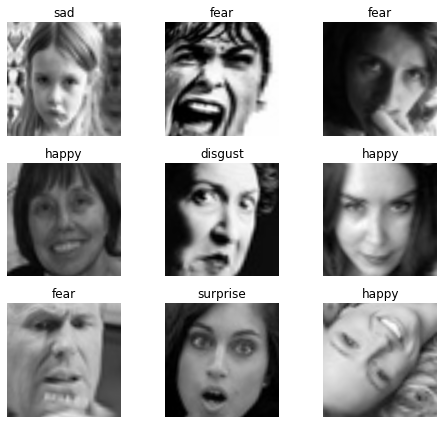

In [10]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
print(data.classes)
len(data.classes),data.c

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


(7, 7)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.671793,1.476638,0.559440,1:13:53
1,1.435312,1.304701,0.497594,05:31
2,1.285565,1.198500,0.458251,05:29
3,1.246795,1.167867,0.447495,05:29


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [16]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


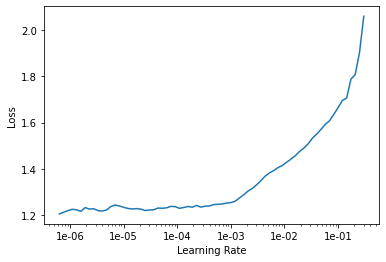

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.074051,0.969703,0.358194,05:43
1,0.902087,0.883444,0.328191,05:47


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

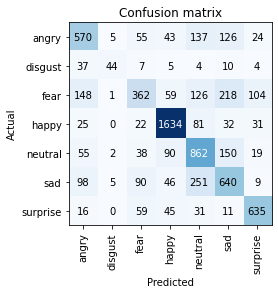

In [17]:
interp.plot_confusion_matrix()

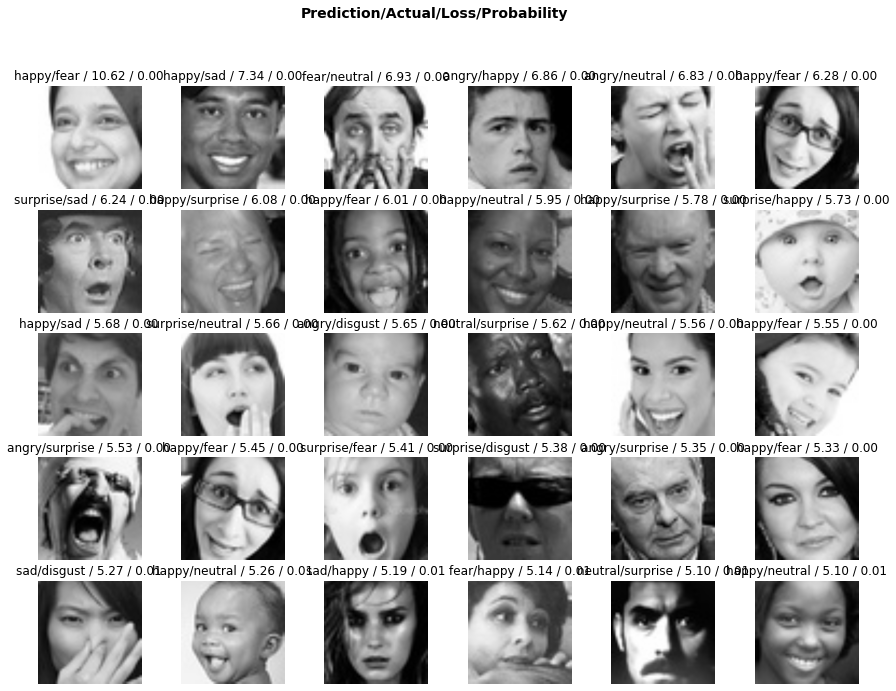

In [24]:
interp.plot_top_losses(30, figsize=(15,11))

In [0]:
learn.export()